# Satellite Image Similarity

In [14]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os  

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar" the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity index for the images
    tmpA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    tmpB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    m = mse(tmpA, tmpB)
    s = ssim(tmpA, tmpB)

    fig = plt.figure(figsize=(8, 4))
    plt.title(title) 
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    plt.subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.show()

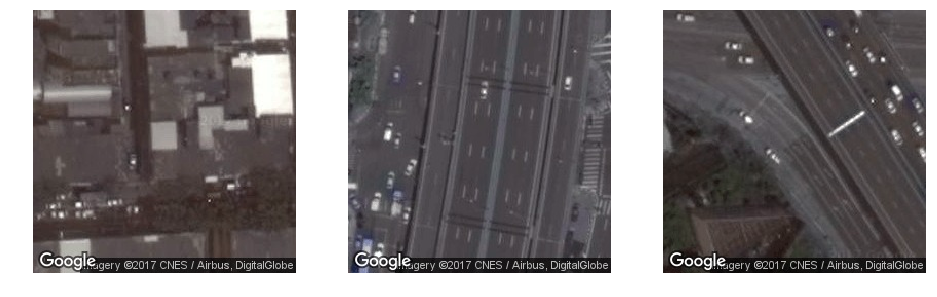

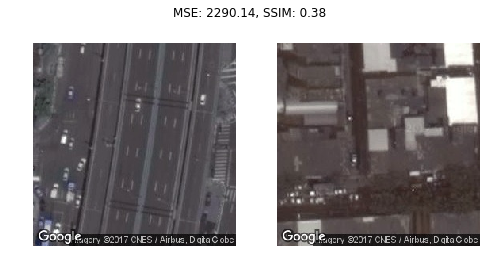

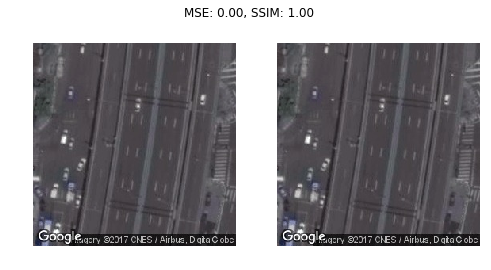

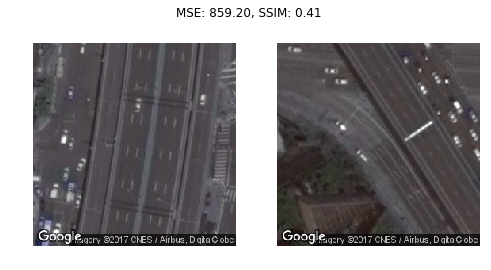

In [15]:
# initialize the figure
fig = plt.figure(figsize=(16, 10))

b = cv2.imread("JJ_market/JJ_13.7893309_100.558697_z19.jpg")
c = cv2.imread("JJ_market/JJ_13.7893309_100.561441_z19.jpg")
i = cv2.imread("JJ_market/JJ_13.8298484_100.541547_z19.jpg")

images =  ("b",b),("c",c),("i",i)

for (i, (name, image)) in enumerate(images):
    ax = fig.add_subplot(1, len(images), i + 1)
    _ = plt.imshow(image, cmap = plt.cm.gray)
    _ = plt.axis("off")
plt.show()

for (i, (name, image)) in enumerate(images):
    compare_images(c, image, name)

## Compute Similarlity on Entire Corpus

In [5]:
directory = '/home/poom/results/'

def compare(A,B):
    img_a = cv2.cvtColor(cv2.imread(A), cv2.COLOR_BGR2GRAY)
    img_b = cv2.cvtColor(cv2.imread(B), cv2.COLOR_BGR2GRAY)
    m = mse(img_a, img_b)
    # s = ssim(img_a, img_b)
    return m

In [ ]:
from tqdm import tnrange, tqdm_notebook
i = 1
for A in tqdm_notebook(os.listdir(directory), desc='1st loop'):
    if i > 121:
        print(A)
        file = open('index/'+A[:-4],'w') 
        for B in tqdm_notebook(os.listdir(directory), desc='2nd loop'):
            m = compare(directory+A,directory+B)
            file.write(B + ', ' + str(m) + '\n') 
        file.close()
    i += 1